# Solutions to Exercise Fourier Transform 1
---

### Exercise 1

Consider the function
$$
\delta_{\epsilon}(t-t_0) = \frac{1}{\sqrt{\pi \epsilon}}e^{-\frac{(t-t_0)^2}{\epsilon}}
$$

(a) Plot $\delta_{\epsilon}(t)$ for some values of $\epsilon$ (e.g. $\epsilon=1,\frac{1}{2},\ldots)$ and $t_0$.

(b) Use numerical integration to calculate 
$$
\int_{-\infty}^{\infty}\delta_{\epsilon}(t)\mathrm{d}t 
$$
Hint: Your result should always be one.

(c) Consider the function $f(t) = t^2$.
- Plot $\delta_{\epsilon}(t-t_0)\cdot f(t)$ and $f(t)$ for a small value of $\epsilon$ (use an arbitrary value for $t_0$).
- Use numerical integration to calculate:
$$
\int_{-\infty}^{\infty}\delta_{\epsilon}(t-t_0)  f(t)\, \mathrm{d}t 
$$
- Compare the outcome of your intgeration with the expected result $f(t_0)$.

Integralwert=1.0
Integralwert=1.0
Integralwert=1.0


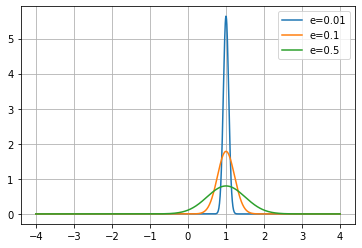

In [5]:
import numpy as np
import matplotlib.pyplot as plt

################
# Your code here
################
N = 1000
L = 4
e = np.array([0.01,0.1,0.5])
t0 = 1
t = np.linspace(-L,L,N)
for e in e:
    d_e = 1/np.sqrt(np.pi*e)*np.exp(-(t-t0)**2/e)
    print('Integralwert={}'.format(np.around(np.sum(d_e)*(2*L/(N-1)),decimals=3)))
    plt.plot(t,d_e,label='e={}'.format(e))
plt.grid()
plt.legend()

In [6]:
e = 0.0001
t0 = -2
d_e = 1/np.sqrt(np.pi*e)*np.exp(-(t-t0)**2/e)
f = t**2
np.sum((d_e*f)*2*L/(N-1))

4.000050000000006

### Exercise 2

(a) Calculate the Fourier transform $F(\omega )$ of the rectangle-function
$$
f(t) = 
\begin{cases} 1 & |t|<1 \\ 0  & |t|>1\end{cases}
$$
and plot $F(\omega)$.

(b) Calculate the Fourier transform $F(\omega)$ of the function
$$
f(t) = \delta(t-a) + \delta(t+a)
$$
and plot $F(\omega)$

(c) Calculate the Fourier transform $F(\omega)$ of the function
$$
f(t) = H(t) e^{-at}
$$
for plot $|F(\omega)|$ for $a=1$.


As results you should obtain:
$$
(a)\, F(\omega )  = 2\frac{\sin(a\omega )}{\omega },\quad 
(b)\, F(\omega )  = 2\cos(a\omega),\quad
(c)\, F(\omega )  = \frac{1}{a+i\omega},\quad 
$$


### Solutions 
(a) As the function in nonzero only between $-1$ and $1$ (where is has the value 1), we obtain
$$
F(\omega) = \int_{-1}^1 e^{-i\omega t}\mathrm{d}t = \left[\frac{1}{-i\omega}e^{-i\omega t}\right]_{-1}^1 = \frac{2}{\omega}\underbrace{\frac{1}{2i}\left(e^{i\omega }-e^{-i\omega }\right)}_{=\sin(\omega)} = 2\frac{\sin(\omega)}{\omega}
$$
(b) Here we obtain (we use $\int f(t)\delta(t-t_0)\mathrm{d}t = f(t_0)$): 
$$
F(\omega) = \int_{-\infty}^\infty \left(\delta(t-a) + \delta(t+a)\right)e^{-i\omega t}\mathrm{d}t = e^{-i\omega a} + e^{i\omega a} = 2\underbrace{\frac{1}{2}\left(e^{i\omega a} + e^{-i\omega a}\right)}_{=\cos(a\omega)} = 2\cos(a\omega)
$$
(c) As the Heaviside/step-function is zero for all $t<0$ we obtain
$$
F(\omega) = \int_{0}^\infty e^{-a t}e^{-i\omega t}\mathrm{d}t  = 
\int_{0}^\infty e^{-(a+i\omega) t}\mathrm{d}t = \left[\frac{1}{-(a+i\omega)}e^{-(a+i\omega) t}\right]_0^{\infty} = 0 - \frac{1}{-(a+i\omega)} = \frac{1}{i\omega+a}
$$

The following 

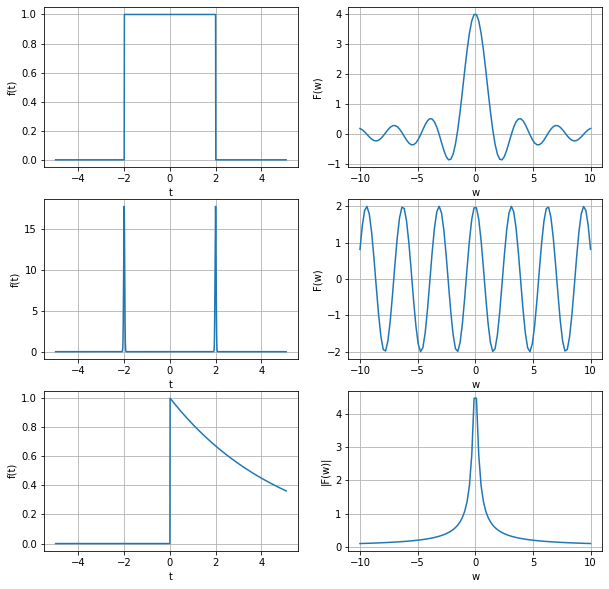

In [15]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-5,5.1,0.01)
w = np.linspace(-10,10,100)

plt.figure(figsize=(10,10))

# (a)
plt.subplot(3,2,1)
f = np.zeros(t.size)
a = 2
f[np.abs(t)<2] = 1
plt.plot(t,f)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()

plt.subplot(3,2,2)
plt.plot(w,2*np.sin(a*w)/w)
plt.xlabel('w')
plt.ylabel('F(w)')
plt.grid()


# (b)
plt.subplot(3,2,3)
e = 0.001
a = 2
f = 1/np.sqrt(np.pi*e)*np.exp(-(t-a)**2/e) + 1/np.sqrt(np.pi*e)*np.exp(-(t+a)**2/e)
plt.plot(t,f)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()

plt.subplot(3,2,4)
plt.plot(w,2*np.cos(a*w))
plt.xlabel('w')
plt.ylabel('F(w)')
plt.grid()

# (c)
plt.subplot(3,2,5)
a = .2
f = np.exp(-a*t)
f[t<0] = 0
plt.plot(t,f)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()

plt.subplot(3,2,6)
plt.plot(w,np.abs(1/(1j*w+a)))
plt.xlabel('w')
plt.ylabel('|F(w)|')
plt.grid()

### Exercise 3

For the Fourier transform the following relation holds:
$$
 f(\beta t)  \quad  \Laplace  \quad \frac{1}{|\beta|}F\left( \frac{\omega }{\beta} \right)\qquad (1)
$$
- Consider the function from exercise 2(a) and plot $f(\beta t)$ and its corresponding Fourier transform for some values of $\beta$ (e.g. $\beta=1,0.5,0.25,\ldots$)
- Explain in words the meaning of equation (1).

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/tljh/user/lib/python3.6/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


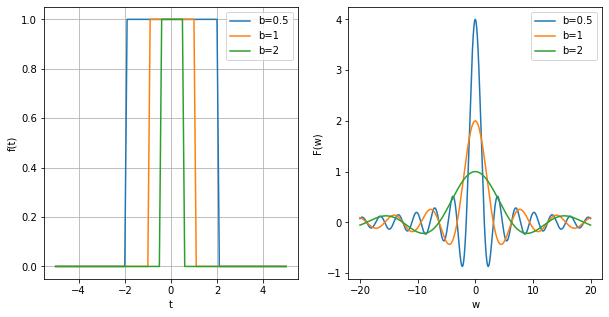

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-5,5.1,0.1)
w = np.linspace(-20,20,100000)

################
# Your code here
################
plt.figure(figsize=(10,5))
#beta = [2,1,0.25,0.1]
beta = [.5,1,2]
plt.subplot(1,2,1)
for b in beta:
    f = np.zeros(t.size)
    f[np.abs(t)<1/b] = 1
    plt.plot(t,f,label='b={}'.format(b))
    plt.xlabel('t')
    plt.ylabel('f(t)')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
for b in beta:
    plt.plot(w,2/b*np.sin(w/b)/(w/b),label='b={}'.format(b))
    plt.xlabel('w')
    plt.ylabel('F(w)')
    plt.grid()
plt.legend()
plt.grid()
